In [54]:
import pandas as pd
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import re

In [55]:
df = pd.read_csv("video_info_2022_8_30.csv")
df.head()

,Channel,Title,Views,Post-Time
0,T-Series,#TujheBhulaDiya 😭#RanbirKapoor 👨‍🎤 #SadSongSta...,11K views,4 hours ago
1,T-Series,MASTI TAKITA DHUM (Full Vudio) Shabaash Mithu ...,22K views,6 hours ago
2,T-Series,Mere Dil Gaaye Ja (Zooby Zooby) Dhokha | R. Ma...,798K views,9 hours ago
3,T-Series,Ganpati Bappa Morya (Video Jukebox) Filmy Ganp...,94K views,17 hours ago
4,T-Series,Sabri Brothers: Teri Jawani Badi Mast Mast Hai...,78K views,1 day ago


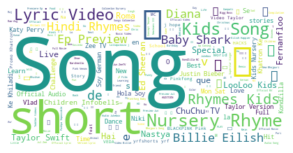

In [56]:
text = " ".join(word for word in df['Title'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(5,5))
plt.imshow(wordcloud.recolor(colormap='viridis', random_state = 17), interpolation='bilinear')
plt.axis("off")
plt.show()

In [57]:
views_list = []

for value in df['Views'].values:
    

    
    number_result = int(re.search("\d+", value).group())
    
    letter_result = re.search("[K,M,B]", value)
        
        
    if letter_result is not None:   


        if letter_result.group() == "K":
            number_result = number_result * 10**3

        if letter_result.group() =="M":
            number_result = number_result * 10**6

        if letter_result.group() == "B":
            number_result = number_result * 10**9

    views_list.append(number_result)
views_list

[11000,
 22000,
 798000,
 94000,
 78000,
 29000,
 353000,
 7000000,
 42000,
 47000,
 33000,
 56000,
 102000,
 28000,
 173000,
 89000,
 54000,
 49000,
 72000,
 339000,
 231000,
 8000000,
 11000,
 55000,
 360000,
 83000,
 22000000,
 60000,
 55000,
 61000,
 504000,
 4000000,
 21000000,
 9000000,
 13000000,
 10000000,
 13000000,
 24000000,
 8000000,
 20000000,
 8000000,
 13000000,
 14000000,
 8000000,
 10000000,
 6000000,
 8000000,
 22000000,
 12000000,
 26000000,
 25000000,
 10000000,
 22000000,
 32000000,
 36000000,
 31000000,
 21000000,
 13000000,
 18000000,
 21000000,
 17000,
 11000,
 20000,
 15000,
 22000,
 4000,
 10000,
 17000,
 2000,
 7000,
 11000,
 2000,
 2000,
 12000,
 25000,
 17000,
 7000,
 88000,
 6000,
 19000,
 7000,
 7000,
 5000,
 35000,
 8000,
 12000,
 16000,
 341000,
 45000,
 84000,
 41000000,
 64000000,
 19000000,
 73000000,
 51000000,
 100000000,
 94000000,
 86000000,
 126000000,
 72000000,
 58000000,
 83000000,
 286000000,
 68000000,
 98000000,
 81000000,
 80000000,
 1810

In [58]:
df['Views_Numeric'] = views_list
df.head()

,Channel,Title,Views,Post-Time,Views_Numeric
0,T-Series,#TujheBhulaDiya 😭#RanbirKapoor 👨‍🎤 #SadSongSta...,11K views,4 hours ago,11000
1,T-Series,MASTI TAKITA DHUM (Full Vudio) Shabaash Mithu ...,22K views,6 hours ago,22000
2,T-Series,Mere Dil Gaaye Ja (Zooby Zooby) Dhokha | R. Ma...,798K views,9 hours ago,798000
3,T-Series,Ganpati Bappa Morya (Video Jukebox) Filmy Ganp...,94K views,17 hours ago,94000
4,T-Series,Sabri Brothers: Teri Jawani Badi Mast Mast Hai...,78K views,1 day ago,78000


In [64]:
timing = []

for value in df['Post-Time'].values:
    number_result = int(re.search('\d',value).group())
    
    try:
        word_result = re.search('(second|minute|hour|day|week|month|year)',value).group()
        
        if word_result == 'second':
            number_result = 0
        
        if word_result == "minute":
            number_result = number_result / 24 / 60
        
        if word_result == "hour":
            number_result = number_result / 24
        
        if word_result == "week":
            number_result = number_result * 7
            
        if word_result == "month":
            number_result = number_result * 7 * 4
        
        if word_result == "year":
            number_result = number_result * 7 * 4 * 12
            
        timing.append(number_result)
    
    except AttributeError:
        print(f"Expceted Error for value: {value}. Moving on...")
        timing.append(0)
    
timing   

Expceted Error for value: 920K views. Moving on...
Expceted Error for value: 851K views. Moving on...
Expceted Error for value: 987K views. Moving on...
Expceted Error for value: 1.4M views. Moving on...
Expceted Error for value: 743K views. Moving on...
Expceted Error for value: 682K views. Moving on...
Expceted Error for value: 1.3M views. Moving on...
Expceted Error for value: 850K views. Moving on...
Expceted Error for value: 6.2M views. Moving on...
Expceted Error for value: 946K views. Moving on...
Expceted Error for value: 609K views. Moving on...
Expceted Error for value: 2M views. Moving on...
Expceted Error for value: 1.3M views. Moving on...
Expceted Error for value: 557K views. Moving on...
Expceted Error for value: 1.5M views. Moving on...
Expceted Error for value: 680K views. Moving on...
Expceted Error for value: 652K views. Moving on...
Expceted Error for value: 2.6M views. Moving on...
Expceted Error for value: 768K views. Moving on...
Expceted Error for value: 597K vi

[0.16666666666666666,
 0.25,
 0.375,
 0.041666666666666664,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 6,
 7,
 7,
 7,
 0.3333333333333333,
 3,
 7,
 1,
 14,
 14,
 21,
 21,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 0.0027777777777777775,
 0.041666666666666664,
 0.041666666666666664,
 0.041666666666666664,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.125,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.20833333333333334,
 0.20833333333333334,
 0.20833333333333334,
 0.20833333333333334,
 0.25,
 0.25,
 0.25,
 0.2916666666666667,
 0.2916666666666667,
 0.2916666666666667,
 0.2916666666666667,
 0.2916666666666667,
 9,
 21,
 28,
 28,
 28,
 56,
 112,
 140,
 196,
 224,
 224,
 224,
 252,
 

In [65]:
df["Post-Time-Numeric (Days)"] = timing

In [66]:
df.head()

,Channel,Title,Views,Post-Time,Views_Numeric,Post-Time-Numeric (Days)
0,T-Series,#TujheBhulaDiya 😭#RanbirKapoor 👨‍🎤 #SadSongSta...,11K views,4 hours ago,11000,0.166667
1,T-Series,MASTI TAKITA DHUM (Full Vudio) Shabaash Mithu ...,22K views,6 hours ago,22000,0.250000
2,T-Series,Mere Dil Gaaye Ja (Zooby Zooby) Dhokha | R. Ma...,798K views,9 hours ago,798000,0.375000
3,T-Series,Ganpati Bappa Morya (Video Jukebox) Filmy Ganp...,94K views,17 hours ago,94000,0.041667
4,T-Series,Sabri Brothers: Teri Jawani Badi Mast Mast Hai...,78K views,1 day ago,78000,1.000000


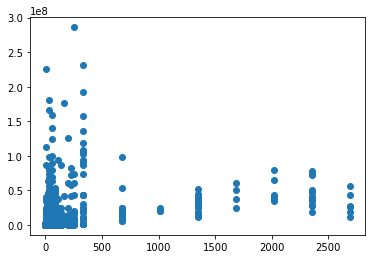

In [67]:
plt.scatter(df['Post-Time-Numeric (Days)'], df['Views_Numeric'])

(array([0.0e+00, 5.0e+07, 1.0e+08, 1.5e+08, 2.0e+08, 2.5e+08]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

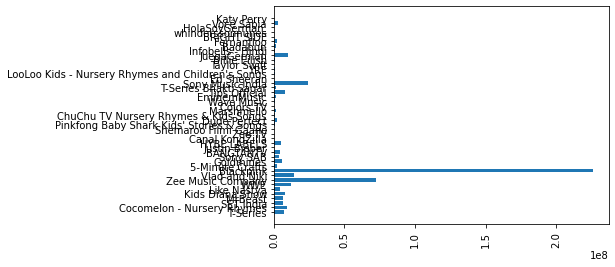

In [81]:
f_df = df[(df["Views_Numeric"] > 100000) | (df['Post-Time-Numeric (Days)'] > 0)]
plt.barh(f_df['Channel'], f_df["Views_Numeric"] / f_df['Post-Time-Numeric (Days)'])
plt.xticks(rotation = 90)
